In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, f, zscore, pointbiserialr
column_names = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]
df = pd.read_csv("Gandum.csv", names=column_names, header=None) #asumsi gandum.csv disimpan di folder sama dengan .ipynb

      id  Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan   Diameter  \
0      1    5781  128.288875   58.470846  0.890095         5954  85.793926   
1      2    4176  109.348294   49.837688  0.890098         4277  72.918093   
2      3    4555  114.427991   52.151207  0.890105         4706  76.155145   
3      4    4141  108.701191   49.457349  0.890499         4236  72.611879   
4      5    5273  122.747869   55.757848  0.890876         5431  81.937733   
..   ...     ...         ...         ...       ...          ...        ...   
495  496    5083  120.083450   54.821580  0.889709         5179  80.447975   
496  497    4432  112.367050   51.294914  0.889726         4550  75.119889   
497  498    5020  119.873742   54.718545  0.889740         5104  79.947874   
498  499    4035  107.311728   48.930802  0.889996         4150  71.676506   
499  500    3379   99.014789   44.631551  0.892647         3491  65.591741   

     KadarAir  Keliling   Bulatan    Ransum  Kelas  
0    0.674

In [21]:
def deskripsiStatistika(df, col_name):
    data = df[col_name]
    print("Analisis "+col_name+":")
    print("count    : "+str(data.count()))
    print("mean     : "+str(data.mean()))
    print("median   : "+str(data.median()))
    print("modus    : ", end="")
    if (len(data.mode()) == data.count()):
        print("NaN")
    else:
        print(str(data.mode()[0]), end="")
        start = True
        for m in data.mode():
            if (start):
                start = False
            else:
                print(", "+str(m), end="")
        print()
    print("stdev    : "+str(data.std()))
    print("variansi : "+str(data.var()))
    print("range    : "+str(data.max()-data.min()))
    print("max      : "+str(data.max()))
    print("min      : "+str(data.min()))
    print("25%      : "+str(data.quantile(0.25)))
    print("50%      : "+str(data.quantile(0.5)))
    print("75%      : "+str(data.quantile(0.75)))
    print("IQR      : "+str(data.quantile(0.75)-data.quantile(0.25)))
    print("skewness : "+str(data.skew()))
    print("kurtosis : "+str(data.kurt()))
        

In [65]:
def visualisasiData(df, col_name, showhist=True, showbox=True):
    if (showhist or showbox):
        data = df[col_name]
        nbins = int((data.count())**0.5+0.999) #ceiling dari akar jumlah data
        
        fig, axs = plt.subplots(ncols=int(showhist)+int(showbox), figsize=(10, 4))
        
        if (int(showhist)+int(showbox) == 1):
            axs = [axs]
        
        fig.suptitle("Visualisasi "+col_name)
        
        if (showhist):
            data.plot.hist(bins=nbins, ax=axs[0])
        if (showbox):
            bx = df.boxplot(column=[col_name], ax=axs[1])
            
        plt.show()

In [56]:
def tesDistribusiNormal(df, col_name):
    data = df[col_name]
    stat, p = shapiro(data) #shapiro-wilk test
    print("Tes normalitas "+col_name)
    print("w-statistic : "+str(stat))
    print("p-value     : "+str(p))
    print("\nP-value lebih ", end="")
    if (p > 0.05): #alpha 0.05 untuk confidence 95%
        print("besar", end="")
    else:
        print("kecil", end="")
    print(" dari 5%, hipotesis bahwa data berdistribusi normal ", end="")
    if (p > 0.05):
        print("gagal ", end="")
    print("ditolak.")
    
    visualisasiData(df, col_name, True, False)

In [206]:
def zTestMean(data, col_name, pStdev, miu0, h1=1):
    # 1. H0: µ = µ0
    h0 = None
    if (h1 == 1): # 2. H1: µ < µ0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (data.mean()-miu0)/(pStdev/(data.count()**0.5)) # z = (xbar - µ0)/(stdev/√n)
        text1 = "H0 "
        text2 = "ditolak. Rata-rata sample "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal): # 5. z-test, z < -z_alpha
            text2 += " lebih kecil daripada "+str(miu0)
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "+str(miu0)
            decision += " tidak"
            h0 = True
        decision += " lebih kecil daripada nilai kritis = -"+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 2): # 2. H1: µ > µ0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (data.mean()-miu0)/(pStdev/(data.count()**0.5)) # z = (xbar - µ0)/(stdev/√n)
        text1 = "H0 "
        text2 = "ditolak. Rata-rata sample "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore > critVal): # 5. z-test, z > z_alpha
            text2 += " lebih besar daripada "+str(miu0)
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "+str(miu0)
            decision += " tidak"
            h0 = True
        decision += " lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 3): # 2. H1: µ ≠ µ0
        sLevel = 0.975 # 3. alpha = 0.05, alpha/2 = 0.025
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_(alpha/2)
        zScore = (data.mean()-miu0)/(pStdev/(data.count()**0.5)) # z = (xbar - µ0)/(stdev/√n)
        text1 = "H0 "
        text2 = "ditolak. Rata-rata sample "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal or zScore > critVal): # 5. z-test, z < -z_(alpha/2) atau z > z_(alpha/2)
            text2 += " tidak"
            h0 = False
        else:
            text1 += "tidak "
            decision += " tidak"
            h0 = True
        text2 += " sama dengan "+str(miu0)
        decision += " lebih kecil daripada minus nilai kritis = -"+('%5f'%critVal)+" atau lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    else:
        print("Bad H1 type")
        
    return h0

In [207]:
def zTestProportion(data, deskripsi, p, p0, h1=1):
    # 1. H0: p = p0
    h0 = None
    if (h1 == 1): # 2. H1: p < p0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (p-p0)/(((p0)*(1-p0)/data.count())**0.5) # z = (p-p0)/(√p0q0/n)
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal): # 5. z-test, z < -z_alpha
            text2 += " lebih kecil daripada "+str(p0)
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "+str(p0)
            decision += " tidak"
            h0 = True
        decision += " lebih kecil daripada nilai kritis = -"+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 2): # 2. H1: p > p0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (p-p0)/(((p0)*(1-p0)/data.count())**0.5) # z = (p-p0)/(√p0q0/n)
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore > critVal): # 5. z-test, z > z_alpha
            text2 += " lebih besar daripada "+str(p0)
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "+str(p0)
            decision += " tidak"
            h0 = True
        decision += " lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 3): # 2. H1: p ≠ p0
        sLevel = 0.975 # 3. alpha = 0.05, alpha/2 = 0.025
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_(alpha/2)
        zScore = (p-p0)/(((p0)*(1-p0)/data.count())**0.5) # z = (p-p0)/(√p0q0/n)
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal or zScore > critVal): # 5. z-test, z < -z_(alpha/2) atau z > z_(alpha/2)
            text2 += " tidak"
            h0 = False
        else:
            text1 += "tidak "
            decision += " tidak"
            h0 = True
        text2 += " sama dengan "+str(p0)
        decision += " lebih kecil daripada minus nilai kritis = -"+('%5f'%critVal)+" atau lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    else:
        print("Bad H1 type")
    
    return h0

In [212]:
def zTestMean2(data1, data2, col_name, pStdev1, pStdev2, d0, h1=1):
    # 1. H0: µ1 - µ2 = d0
    h0 = None
    if (h1 == 1): # 2. H1: µ1 - µ2 < d0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = ((data1.mean()-data2.mean())-d0)/(((pStdev1**2)/data1.count()+(pStdev2**2)/data2.count())**0.5) # z = ((xbar1-xbar2)-d0)/(√((var1/n1)+(var2/n2)))
        text1 = "H0 "
        text2 = "ditolak. Selisih rata-rata sample 1 dengan sample 2 dari "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal): # 5. z-test, z < -z_alpha
            text2 += " lebih kecil dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += str(d0)
        decision += " lebih kecil daripada nilai kritis = -"+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 2): # 2. H1: µ1 - µ2 > d0
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = ((data1.mean()-data2.mean())-d0)/(((pStdev1**2)/data1.count()+(pStdev2**2)/data2.count())**0.5) # z = ((xbar1-xbar2)-d0)/(√((var1/n1)+(var2/n2)))
        text1 = "H0 "
        text2 = "ditolak. Selisih rata-rata sample 1 dengan sample 2 dari "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore > critVal): # 5. z-test, z > z_alpha
            text2 += " lebih besar dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += str(d0)
        decision += " lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 3): # 2. H1: µ1 - µ2 ≠ d0
        sLevel = 0.975 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_(alpha/2)
        zScore = ((data1.mean()-data2.mean())-d0)/(((pStdev1**2)/data1.count()+(pStdev2**2)/data2.count())**0.5) # z = ((xbar1-xbar2)-d0)/(√((var1/n1)+(var2/n2)))
        text1 = "H0 "
        text2 = "ditolak. Selisih rata-rata sample 1 dengan sample 2 dari "+col_name
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal or zScore > critVal): # 5. z-test, z < -z_(alpha/2) or z > z_(alpha/2)
            text2 += " tidak"
            h0 = False
        else:
            text1 += "tidak "
            decision += " tidak"
            h0 = True
        text2 += " sama dengan "+str(d0)
        decision += " lebih kecil daripada minus nilai kritis = -"+('%5f'%critVal)+" atau lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    else:
        print("Bad H1 type")
    
    return h0

In [213]:
def zTestProportion2(data1, data2, deskripsi, x1, x2, h1=1):
    # 1. H0: µ1 - µ2 = d0
    h0 = None
    p = (x1+x2)/(data1.count()+data2.count())
    p1 = x1/data1.count()
    p2 = x2/data2.count()
    if (h1 == 1): # 2. H1: p1 < p2
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (p1-p2)/((p*(1-p)*(1/data1.count()+1/data2.count()))**0.5) # z = (p1-p2)/(pq(1/n1+1/n2))
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample 1"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal): # 5. z-test, z < -z_alpha
            text2 += " lebih kecil dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += "proporsi nilai yang sama di sample 2"
        decision += " lebih kecil daripada nilai kritis = -"+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 2): # 2. H1: p1 > p2
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_alpha
        zScore = (p1-p2)/((p*(1-p)*(1/data1.count()+1/data2.count()))**0.5) # z = (p1-p2)/(pq(1/n1+1/n2))
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample 1"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore > critVal): # 5. z-test, z > z_alpha
            text2 += " lebih besar dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += "proporsi nilai yang sama di sample 2"
        decision += " lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 3): # 2. H1: p1 ≠ p2
        sLevel = 0.975 # 3. alpha = 0.05, alpha/2 = 0.025
        critVal = norm.ppf(sLevel) # 4. z-test, critical value = z_(alpha/2)
        zScore = (p1-p2)/((p*(1-p)*(1/data1.count()+1/data2.count()))**0.5) # z = (p1-p2)/(pq(1/n1+1/n2))
        text1 = "H0 "
        text2 = "ditolak. Proporsi "+deskripsi+" di sample 1"
        decision = "Karena z = "+('%5f'%zScore)
        if (zScore < -critVal or zScore > critVal): # 5. z-test, z < -z_(alpha/2) or z > z_(alpha/2)
            text2 += " tidak"
            h0 = False
        else:
            text1 += "tidak "
            decision += " tidak"
            h0 = True
        text2 += " sama dengan proporsi nilai yang sama di sample 2"
        decision += " lebih kecil daripada minus nilai kritis = -"+('%5f'%critVal)+" atau lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    else:
        print("Bad H1 type")
    
    return h0

In [218]:
def fTestVariance2(data1, data2, col_name, h1=1):
    # 1. H0: µ1 - µ2 = d0
    h0 = None
    n1 = data1.count()
    n2 = data2.count()
    var1 = data1.var()
    var2 = data2.var()
    if (h1 == 1): # 2. H1: s1^2 < s2^2
        sLevel = 0.975 # 3. alpha = 0.05, alpha/2 = 0.025
        critVal = f.ppf(sLevel, n1, n2) # 4. f-test, critical value = f_(1-alpha/2) dengan df1 = n1, df2 = n2
        fScore = var1/var2 # f = s1^2/s2^2
        text1 = "H0 "
        text2 = "ditolak. Variansi sample 1"
        decision = "Karena f = "+('%5f'%fScore)
        if (fScore < -critVal): # 5. f-test, f < -f_(alpha/2) (v1, v2)
            text2 += " lebih kecil dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += "variansi sample 2"
        decision += " lebih kecil daripada nilai kritis = -"+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 2): # 2. H1: s1^2 > s2^2
        sLevel = 0.95 # 3. alpha = 0.05
        critVal = f.ppf(sLevel, n1, n2) # 4. f-test, critical value = f_(1-alpha/2) dengan df1 = n1, df2 = n2
        fScore = var1/var2 # f = s1^2/s2^2
        text1 = "H0 "
        text2 = "ditolak. Variansi sample 1"
        decision = "Karena z = "+('%5f'%zScore)
        if (fScore > critVal): # 5. 5. f-test, f > f_(alpha/2) (v1, v2)
            text2 += " lebih besar dari "
            h0 = False
        else:
            text1 += "tidak "
            text2 += " sama dengan "
            decision += " tidak"
            h0 = True
        text2 += "variansi sample 2"
        decision += " lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    elif (h1 == 3): # 2. H1: s1^2 ≠ s2^2
        sLevel = 0.975 # 3. alpha = 0.05, alpha/2 = 0.025
        critVal = f.ppf(sLevel, n1, n2) # 4. f-test, critical value = f_(1-alpha/2) dengan df1 = n1, df2 = n2
        fScore = var1/var2 # f = s1^2/s2^2
        text1 = "H0 "
        text2 = "ditolak. Variansi sample 1"
        decision = "Karena z = "+('%5f'%fScore)
        if (fScore < -critVal or fScore > critVal): # 5. f-test, f < -f_(alpha/2) (v1, v2) atau f > f_(alpha/2) (v1, v2)
            text2 += " tidak"
            h0 = False
        else:
            text1 += "tidak "
            decision += " tidak"
            h0 = True
        text2 += " sama dengan variansi sample 2"
        decision += " lebih kecil daripada minus nilai kritis = -"+('%5f'%critVal)+" atau lebih besar daripada nilai kritis = "+('%5f'%critVal)+", "
        print(decision, end="")
        print(text1+text2) # 6. Ambil keputusan
    else:
        print("Bad H1 type")
    
    return h0

In [304]:
def correlationTestBinary(df, col_name1, col_name2):
    df2 = df[[col_name1, col_name2]].copy()
    df2 = df2[(np.abs(zscore(df2)) < 3).all(axis=1)].copy() # menghapus outlier menggunakan metode menganggap data dengan selisih 3 standar deviasi dari rata-rata sebagai outlier
    corrVal, pVal = pointbiserialr(df2[col_name2], df2[col_name1])
    print("Nilai korelasi "+col_name1+" dengan "+col_name2+" adalah "+('%5f'%corrVal), end="")
    if (corrVal < 0):
        print(", yaitu korelasi negatif", end="")
    else:
        print(", yaitu korelasi positif", end="")
    if (np.abs(corrVal) > 0.7):
        print(" yang kuat", end="")
    elif (np.abs(corrVal) < 0.3):
        print(" yang lemah", end="")
    if (pVal < 0.0001):
        print(", namun karena nilai p-value "+str(pVal)+", korelasi antara "+col_name1+" dengan "+col_name2+" tidak linier")
    else:
        print(", dengan p-value "+str(pVal))
    
    ax = df2.plot.scatter(x=col_name1, y=col_name2, title="Scatter plot "+col_name1+" dengan "+col_name2)
    
    plt.show()

In [ ]:
# 1.
for col_name in column_names:
    deskripsiStatistika(df, col_name)
    print()

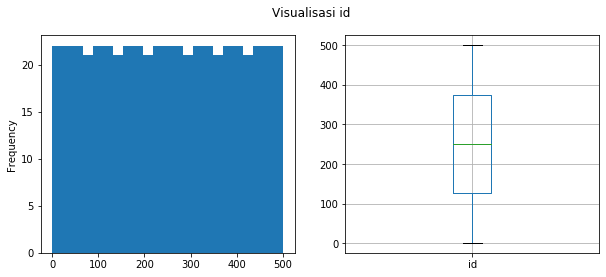

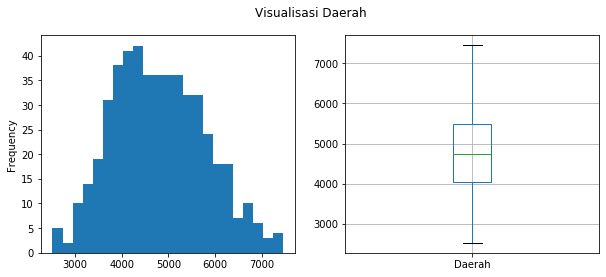

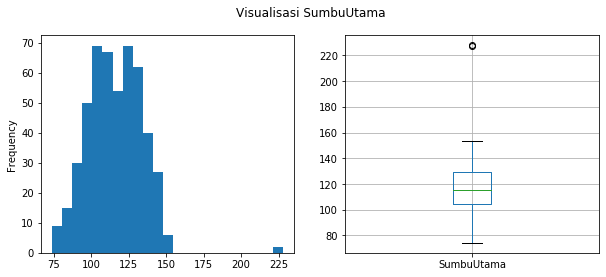

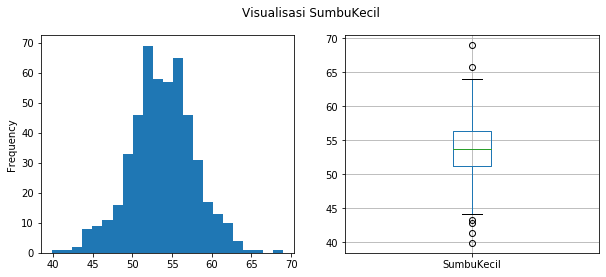

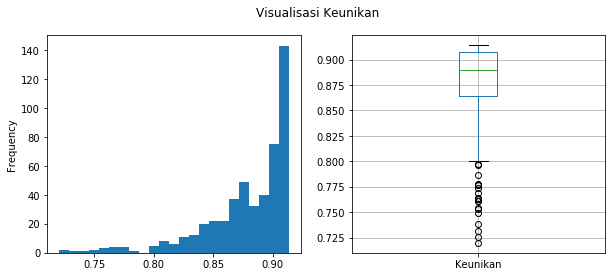

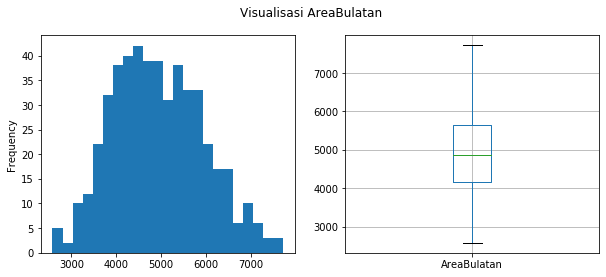

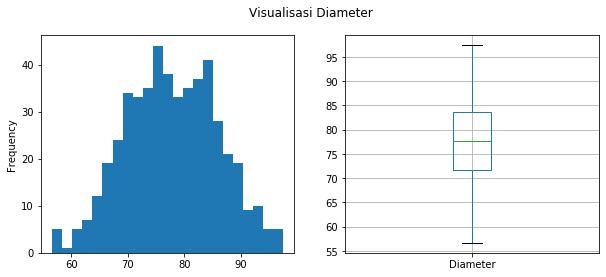

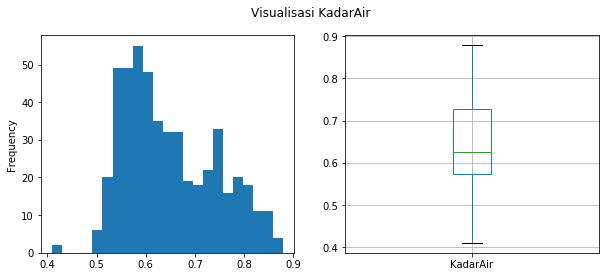

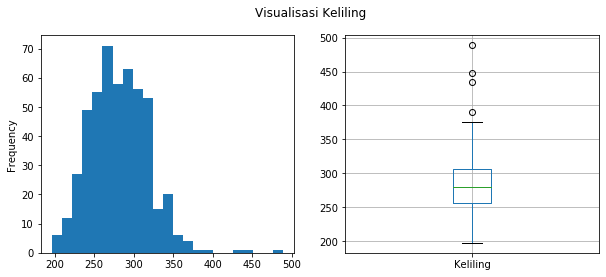

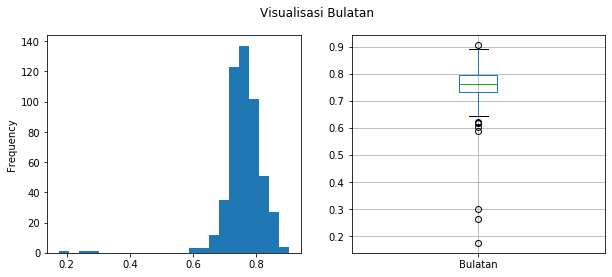

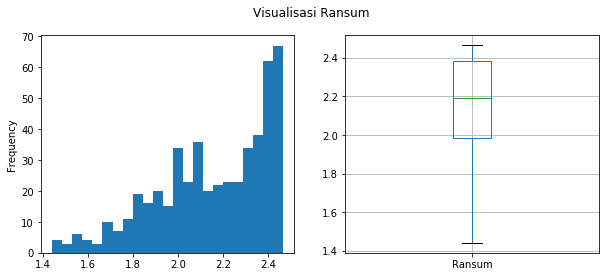

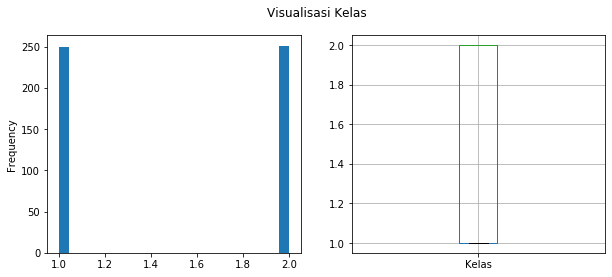

In [63]:
# 2.
for col_name in column_names:
    visualisasiData(df, col_name)

Tes normalitas id
w-statistic : 0.9547221064567566
p-value     : 2.945410582100294e-11

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


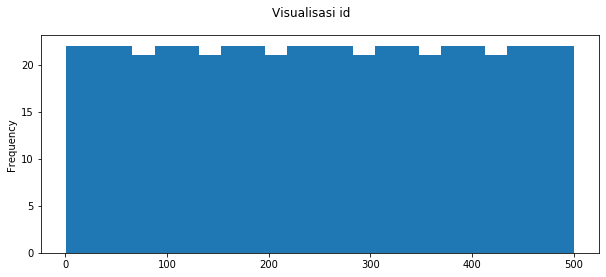


Tes normalitas Daerah
w-statistic : 0.9907860159873962
p-value     : 0.003270698245614767

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


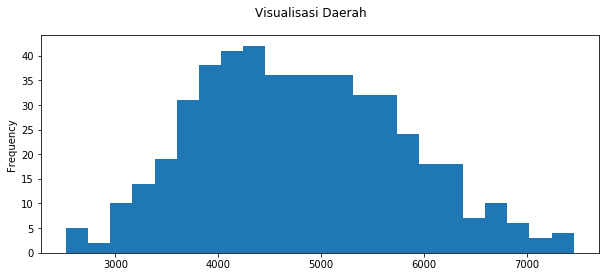


Tes normalitas SumbuUtama
w-statistic : 0.9513812065124512
p-value     : 9.236201213569384e-12

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


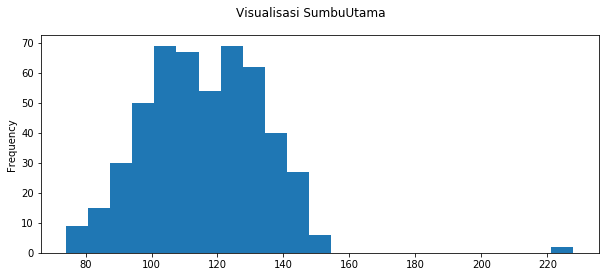


Tes normalitas SumbuKecil
w-statistic : 0.996778666973114
p-value     : 0.4234558641910553

P-value lebih besar dari 5%, hipotesis bahwa data berdistribusi normal gagal ditolak.


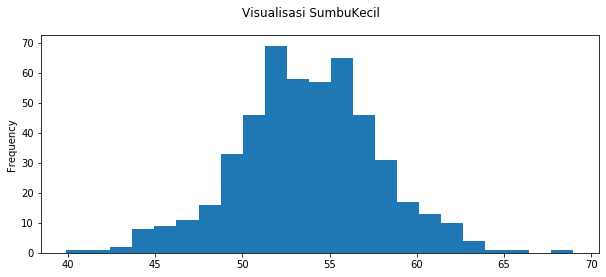


Tes normalitas Keunikan
w-statistic : 0.8309029340744019
p-value     : 1.3151663082081454e-22

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


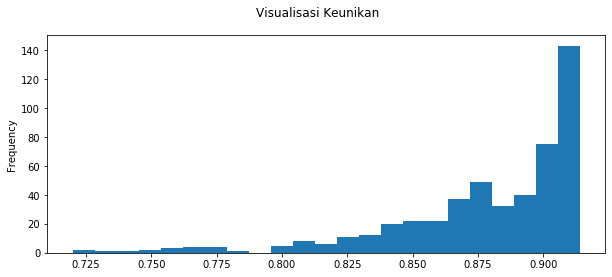


Tes normalitas AreaBulatan
w-statistic : 0.990435779094696
p-value     : 0.0024847122840583324

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


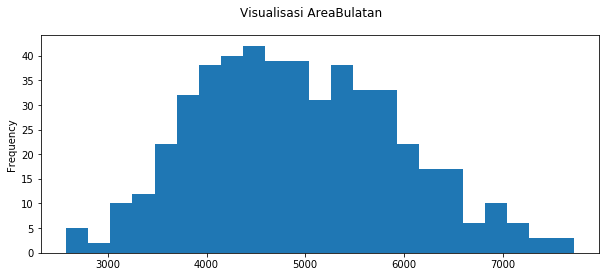


Tes normalitas Diameter
w-statistic : 0.9951366186141968
p-value     : 0.11834503710269928

P-value lebih besar dari 5%, hipotesis bahwa data berdistribusi normal gagal ditolak.


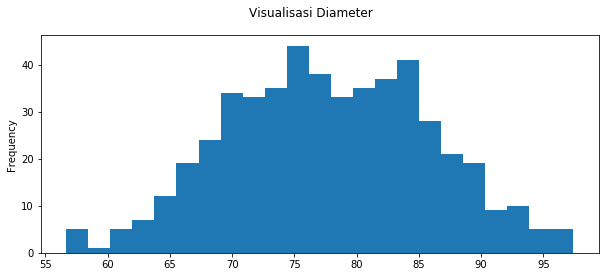


Tes normalitas KadarAir
w-statistic : 0.9466671347618103
p-value     : 1.959499836695633e-12

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


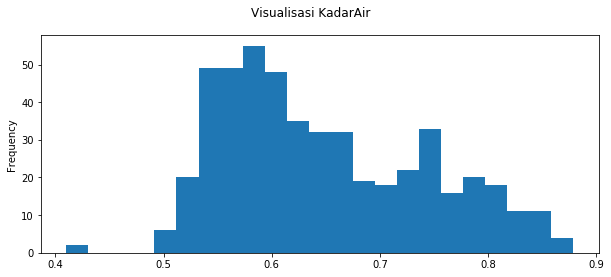


Tes normalitas Keliling
w-statistic : 0.9692449569702148
p-value     : 9.728394090302572e-09

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


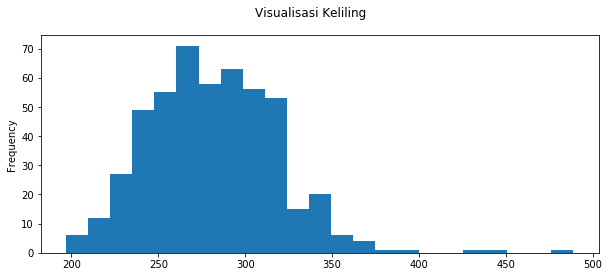


Tes normalitas Bulatan
w-statistic : 0.7697757482528687
p-value     : 6.899158691421287e-26

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


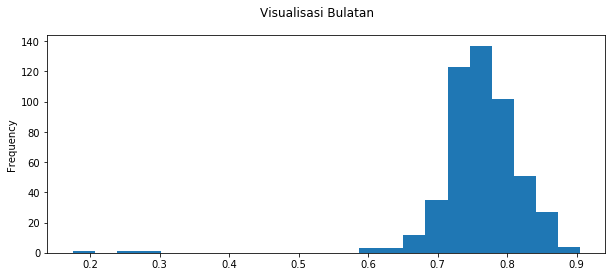


Tes normalitas Ransum
w-statistic : 0.9265043139457703
p-value     : 6.245541108888591e-15

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


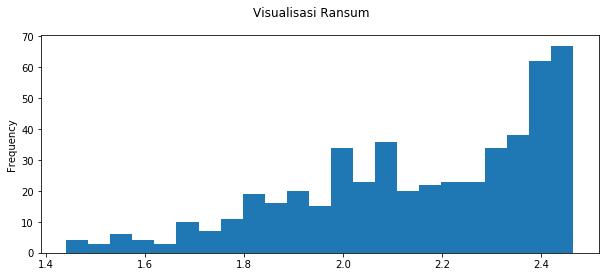


Tes normalitas Kelas
w-statistic : 0.6365421414375305
p-value     : 3.5514183439331154e-31

P-value lebih kecil dari 5%, hipotesis bahwa data berdistribusi normal ditolak.


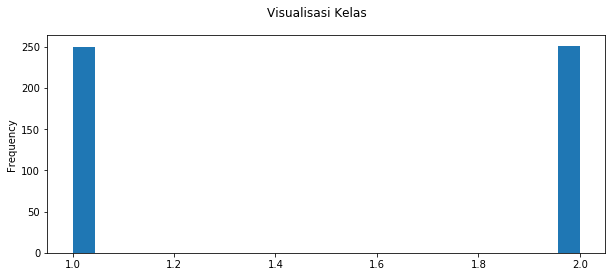

In [66]:
# 3.
for col_name in column_names:
    tesDistribusiNormal(df, col_name)
    print()

In [210]:
# 4. Karena data diperlakukan sebagai populasi, untuk setiap test, standar deviasi populasi diketahui;
#    yakni z-test dapat digunakan
# 4.a.
data = df["Daerah"].sample(frac=0.5, replace=False, random_state=1)
zTestMean(data, "Daerah", df["Daerah"].std(), 4700, 2)
print()
# 4.b.
data = df["SumbuUtama"].sample(frac=0.5, replace=False, random_state=1)
zTestMean(data, "SumbuUtama", df["SumbuUtama"].std(), 116, 3)
print()
# 4.c.
data = df["SumbuKecil"].head(20)
zTestMean(data, "SumbuKecil", df["SumbuKecil"].std(), 50, 3)
print()
# 4.d.
data = df["Diameter"].sample(frac=0.5, replace=False, random_state=1)
x = 0
for each in data:
    if (each > 85):
        x += 1
x /= data.count()
zTestProportion(data, "nilai Diameter yang lebih dari 85", x, 0.15, 3)
print()
# 4.e.
data = df["Keliling"].sample(frac=0.5, replace=False, random_state=1)
x = 0
for each in data:
    if (each < 100):
        x += 1
x /= data.count()
zTestProportion(data, "nilai Keliling yang kurang dari 100", x, 0.05, 1)

Karena z = 2.241816 lebih besar daripada nilai kritis = 1.644854, H0 ditolak. Rata-rata sample Daerah lebih besar daripada 4700

Karena z = 0.281245 tidak lebih kecil daripada minus nilai kritis = -1.959964 atau lebih besar daripada nilai kritis = 1.959964, H0 tidak ditolak. Rata-rata sample SumbuUtama sama dengan 116

Karena z = 5.368745 lebih kecil daripada minus nilai kritis = -1.959964 atau lebih besar daripada nilai kritis = 1.959964, H0 ditolak. Rata-rata sample SumbuKecil tidak sama dengan 50

Karena z = 3.099652 lebih kecil daripada minus nilai kritis = -1.959964 atau lebih besar daripada nilai kritis = 1.959964, H0 ditolak. Proporsi nilai Diameter yang lebih dari 85 di sample tidak sama dengan 0.15

Karena z = -3.627381 lebih kecil daripada nilai kritis = -1.644854, H0 ditolak. Proporsi nilai Keliling yang kurang dari 100 di sample lebih kecil daripada 0.05


False

In [220]:
# 5. Karena data diperlakukan sebagai populasi, untuk setiap test, standar deviasi populasi diketahui;
#    yakni z-test dapat digunakan
# 5.a.
n = df["AreaBulatan"].count()
stdev = df["AreaBulatan"].std()
data1 = df["AreaBulatan"].head(n//2)
data2 = df["AreaBulatan"].tail(int(n/2+0.5))
zTestMean2(data1, data2, "AreaBulatan", stdev, stdev, 0, 3)
print()
# 5.b.
n = df["KadarAir"].count()
stdev = df["KadarAir"].std()
data1 = df["KadarAir"].head(n//2)
data2 = df["KadarAir"].tail(int(n/2+0.5))
zTestMean2(data1, data2, "KadarAir", stdev, stdev, 0.2, 2)
print()
# 5.c.
n = df["Bulatan"].count()
stdev = df["Bulatan"].std()
data1 = df["Bulatan"].head(20)
data2 = df["Bulatan"].tail(20)
zTestMean2(data1, data2, "Bulatan", stdev, stdev, 0, 3)
print()
# 5.d.
n = df["Ransum"].count()
data1 = df["Ransum"].head(n//2)
data2 = df["Ransum"].tail(int(n/2+0.5))
x1 = 0
x2 = 0
for each in data1:
    if (each > 2):
        x1 += 1
for each in data2:
    if (each > 2):
        x2 += 1
zTestProportion2(data1, data2, "nilai Ransum yang lebih dari 2", x1, x2, 2)
print()
# 5.e.
n = df["Diameter"].count()
data1 = df["Diameter"].head(n//2)
data2 = df["Diameter"].tail(int(n/2+0.5))
fTestVariance2(data1, data2, "Diameter", 3)

Karena z = 13.543236 lebih kecil daripada minus nilai kritis = -1.959964 atau lebih besar daripada nilai kritis = 1.959964, H0 ditolak. Selisih rata-rata sample 1 dengan sample 2 dari AreaBulatan tidak sama dengan 0

Karena z = -26.687732 tidak lebih besar daripada nilai kritis = 1.644854, H0 tidak ditolak. Selisih rata-rata sample 1 dengan sample 2 dari KadarAir sama dengan 0.2

Karena z = -1.526601 tidak lebih kecil daripada minus nilai kritis = -1.959964 atau lebih besar daripada nilai kritis = 1.959964, H0 tidak ditolak. Selisih rata-rata sample 1 dengan sample 2 dari Bulatan sama dengan 0

Karena z = 13.397486 lebih besar daripada nilai kritis = 1.644854, H0 ditolak. Proporsi nilai Ransum yang lebih dari 2 di sample 1 lebih besar dari proporsi nilai yang sama di sample 2

Karena z = 1.083878 tidak lebih kecil daripada minus nilai kritis = -1.282081 atau lebih besar daripada nilai kritis = 1.282081, H0 tidak ditolak. Variansi sample 1 sama dengan variansi sample 2


True

Nilai korelasi Daerah dengan Kelas adalah -0.602747, yaitu korelasi negatif, namun karena nilai p-value 8.925696449478748e-51, korelasi antara Daerah dengan Kelas tidak linier


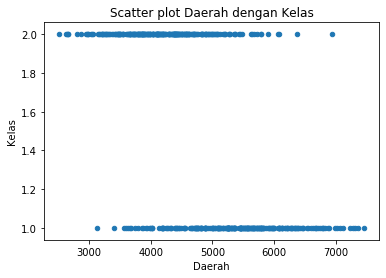

Nilai korelasi SumbuUtama dengan Kelas adalah -0.748103, yaitu korelasi negatif yang kuat, namun karena nilai p-value 2.1846713182010446e-90, korelasi antara SumbuUtama dengan Kelas tidak linier


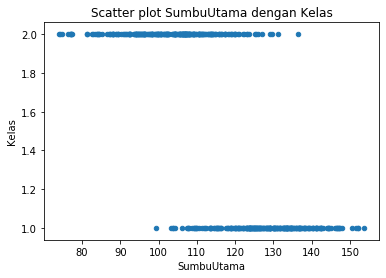

Nilai korelasi SumbuKecil dengan Kelas adalah -0.166094, yaitu korelasi negatif yang lemah, dengan p-value 0.00019973696022846166


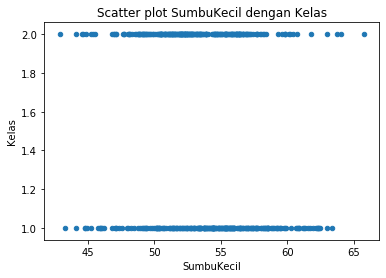

Nilai korelasi Keunikan dengan Kelas adalah -0.791628, yaitu korelasi negatif yang kuat, namun karena nilai p-value 7.778802858931979e-106, korelasi antara Keunikan dengan Kelas tidak linier


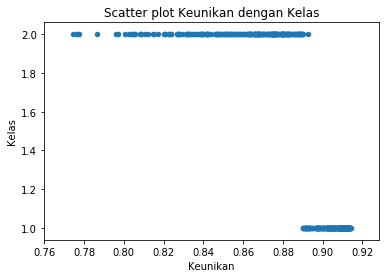

Nilai korelasi AreaBulatan dengan Kelas adalah -0.607313, yaitu korelasi negatif, namun karena nilai p-value 1.0113804362947884e-51, korelasi antara AreaBulatan dengan Kelas tidak linier


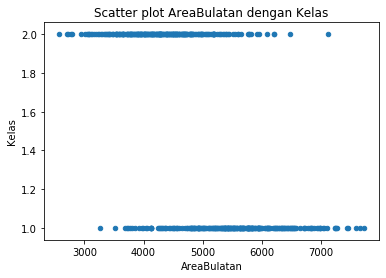

Nilai korelasi Diameter dengan Kelas adalah -0.602536, yaitu korelasi negatif, namun karena nilai p-value 9.86211399017465e-51, korelasi antara Diameter dengan Kelas tidak linier


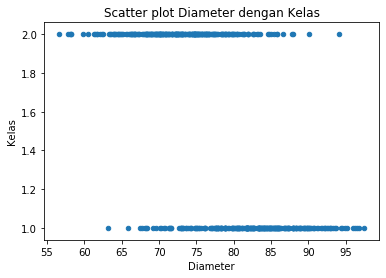

Nilai korelasi KadarAir dengan Kelas adalah 0.134344, yaitu korelasi positif yang lemah, dengan p-value 0.0026110483612914737


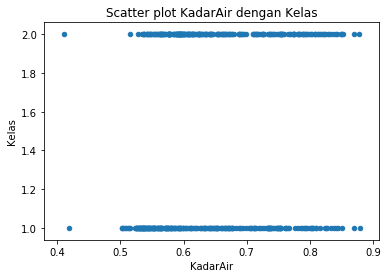

Nilai korelasi Keliling dengan Kelas adalah -0.678458, yaitu korelasi negatif, namun karena nilai p-value 2.6820027492896112e-68, korelasi antara Keliling dengan Kelas tidak linier


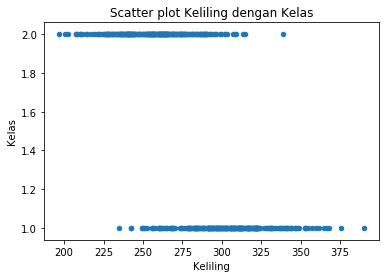

Nilai korelasi Bulatan dengan Kelas adalah 0.706467, yaitu korelasi positif yang kuat, namun karena nilai p-value 2.4753740145731844e-76, korelasi antara Bulatan dengan Kelas tidak linier


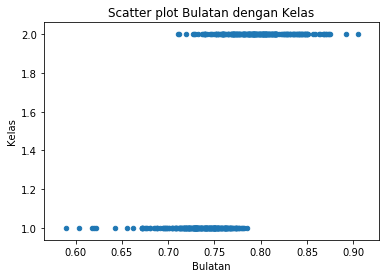

In [306]:
for col_name in column_names[1:-2]:
    correlationTestBinary(df, col_name, "Kelas")

Nilai korelasi A dengan B adalah 0.988901, yaitu korelasi positif yang kuat, namun karena nilai p-value 5.760890891667227e-83, korelasi antara A dengan B tidak linier


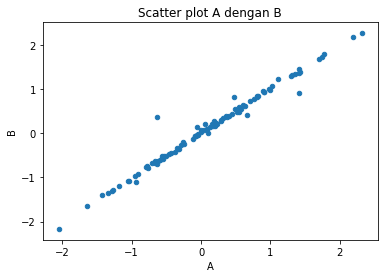

In [305]:
rr = np.random.randn(100)
rredit = [rr[i]+((-1)**i)/(i+1) for i in range(len(rr))]
dat = [[rr[i], rredit[i]] for i in range(len(rr))]
df2 = pd.DataFrame(dat, columns=["A", "B"])
correlationTestBinary(df2, "A", "B")